# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, f_oneway

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from catboost import CatBoostClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

import joblib

# Understanding the Dataset

In [2]:
df = pd.read_csv("obesity.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'favc', 'fcvc', 'ncp', 'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue',
       'calc', 'mtrans', 'nobeyesdad'],
      dtype='object')

In [4]:
df.shape

(2111, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          2111 non-null   object 
 1   age                             2111 non-null   int64  
 2   height                          2111 non-null   float64
 3   weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   favc                            2111 non-null   object 
 6   fcvc                            2111 non-null   float64
 7   ncp                             2111 non-null   float64
 8   caec                            2111 non-null   object 
 9   smoke                           2111 non-null   object 
 10  ch2o                            2111 non-null   float64
 11  scc                             2111 non-null   object 
 12  faf                             21

In [6]:
df.describe()

,age,height,weight,fcvc,ncp,ch2o,faf,tue
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.describe(include="object")

,gender,family_history_with_overweight,favc,caec,smoke,scc,calc,mtrans,nobeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [8]:
# target variable

df["nobeyesdad"].value_counts().to_frame()

,count
nobeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


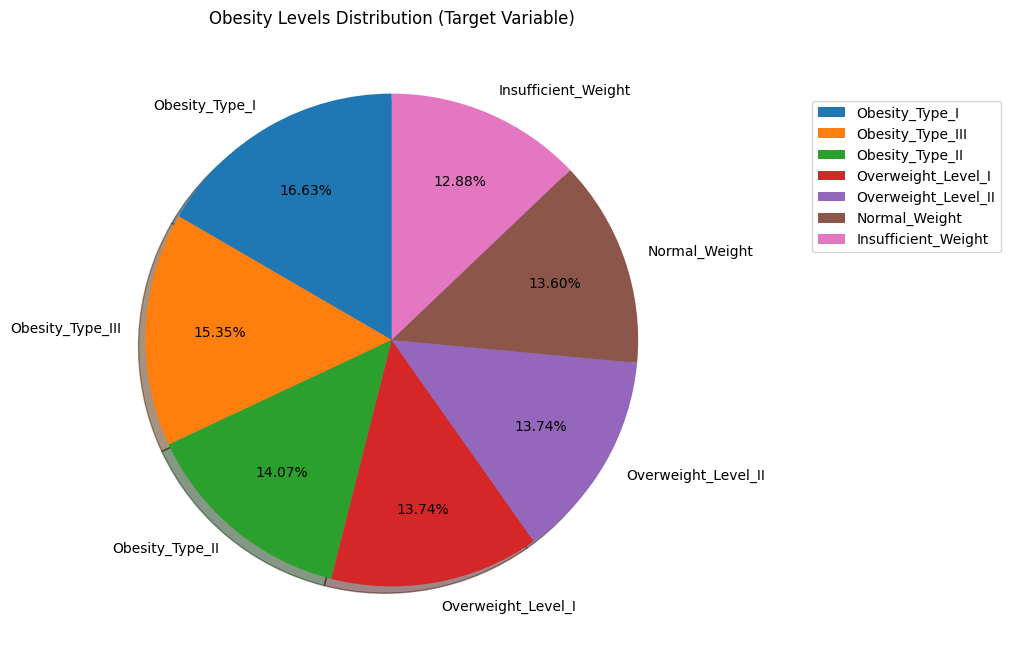

In [9]:
# visualisation of target variable

plt.figure(figsize=(8, 8))
plt.pie(
    x=df['nobeyesdad'].value_counts(),
    labels=df['nobeyesdad'].value_counts().index,
    shadow=True,
    autopct='%0.2f%%',
    startangle=90,
    pctdistance=0.7
)
plt.title('Obesity Levels Distribution (Target Variable)')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.9))
plt.show()

# Data Cleaning and Preprocessing

In [10]:
df.isnull().sum()

gender                            0
age                               0
height                            0
weight                            0
family_history_with_overweight    0
favc                              0
fcvc                              0
ncp                               0
caec                              0
smoke                             0
ch2o                              0
scc                               0
faf                               0
tue                               0
calc                              0
mtrans                            0
nobeyesdad                        0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(24)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
cat_cols = df.select_dtypes(include="object").columns.drop('nobeyesdad')
cat_cols

Index(['gender', 'family_history_with_overweight', 'favc', 'caec', 'smoke',
       'scc', 'calc', 'mtrans'],
      dtype='object')

In [14]:
for col in cat_cols:
    print(df[col].value_counts())
    print()

gender
Male      1052
Female    1035
Name: count, dtype: int64

family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64

favc
yes    1844
no      243
Name: count, dtype: int64

caec
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64

smoke
no     2043
yes      44
Name: count, dtype: int64

scc
no     1991
yes      96
Name: count, dtype: int64

calc
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64

mtrans
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64



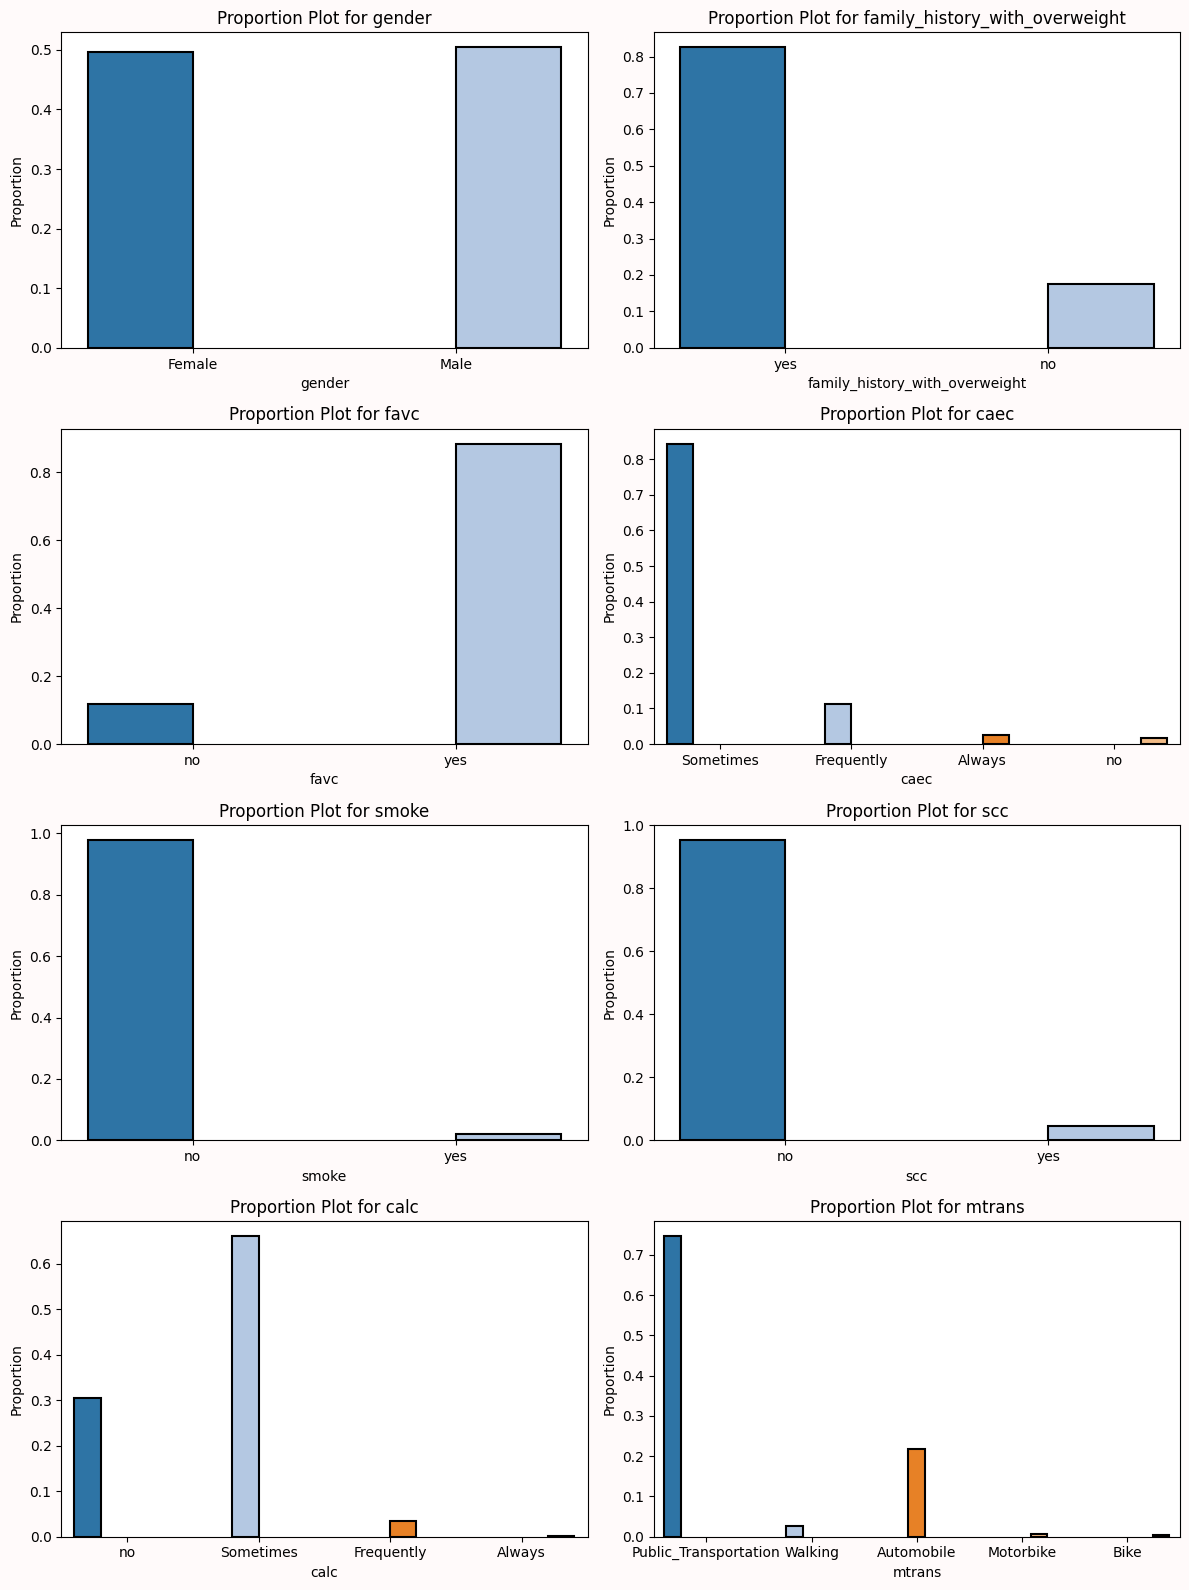

In [15]:
# creating a barplot

fig, axes = plt.subplots(4, 2, figsize=(12, 16), facecolor='snow')
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    proportions = df[col].value_counts(normalize=True,sort=False)
    
    sns.barplot(x=proportions.index, y=proportions.values, palette='tab20',
                dodge=True, edgecolor='black', linewidth=1.5, saturation=0.8, ax=ax)
    
    ax.set_title(f'Proportion Plot for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Proportion')

plt.tight_layout()
plt.show()

In [16]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['age', 'height', 'weight', 'fcvc', 'ncp', 'ch2o', 'faf', 'tue'], dtype='object')

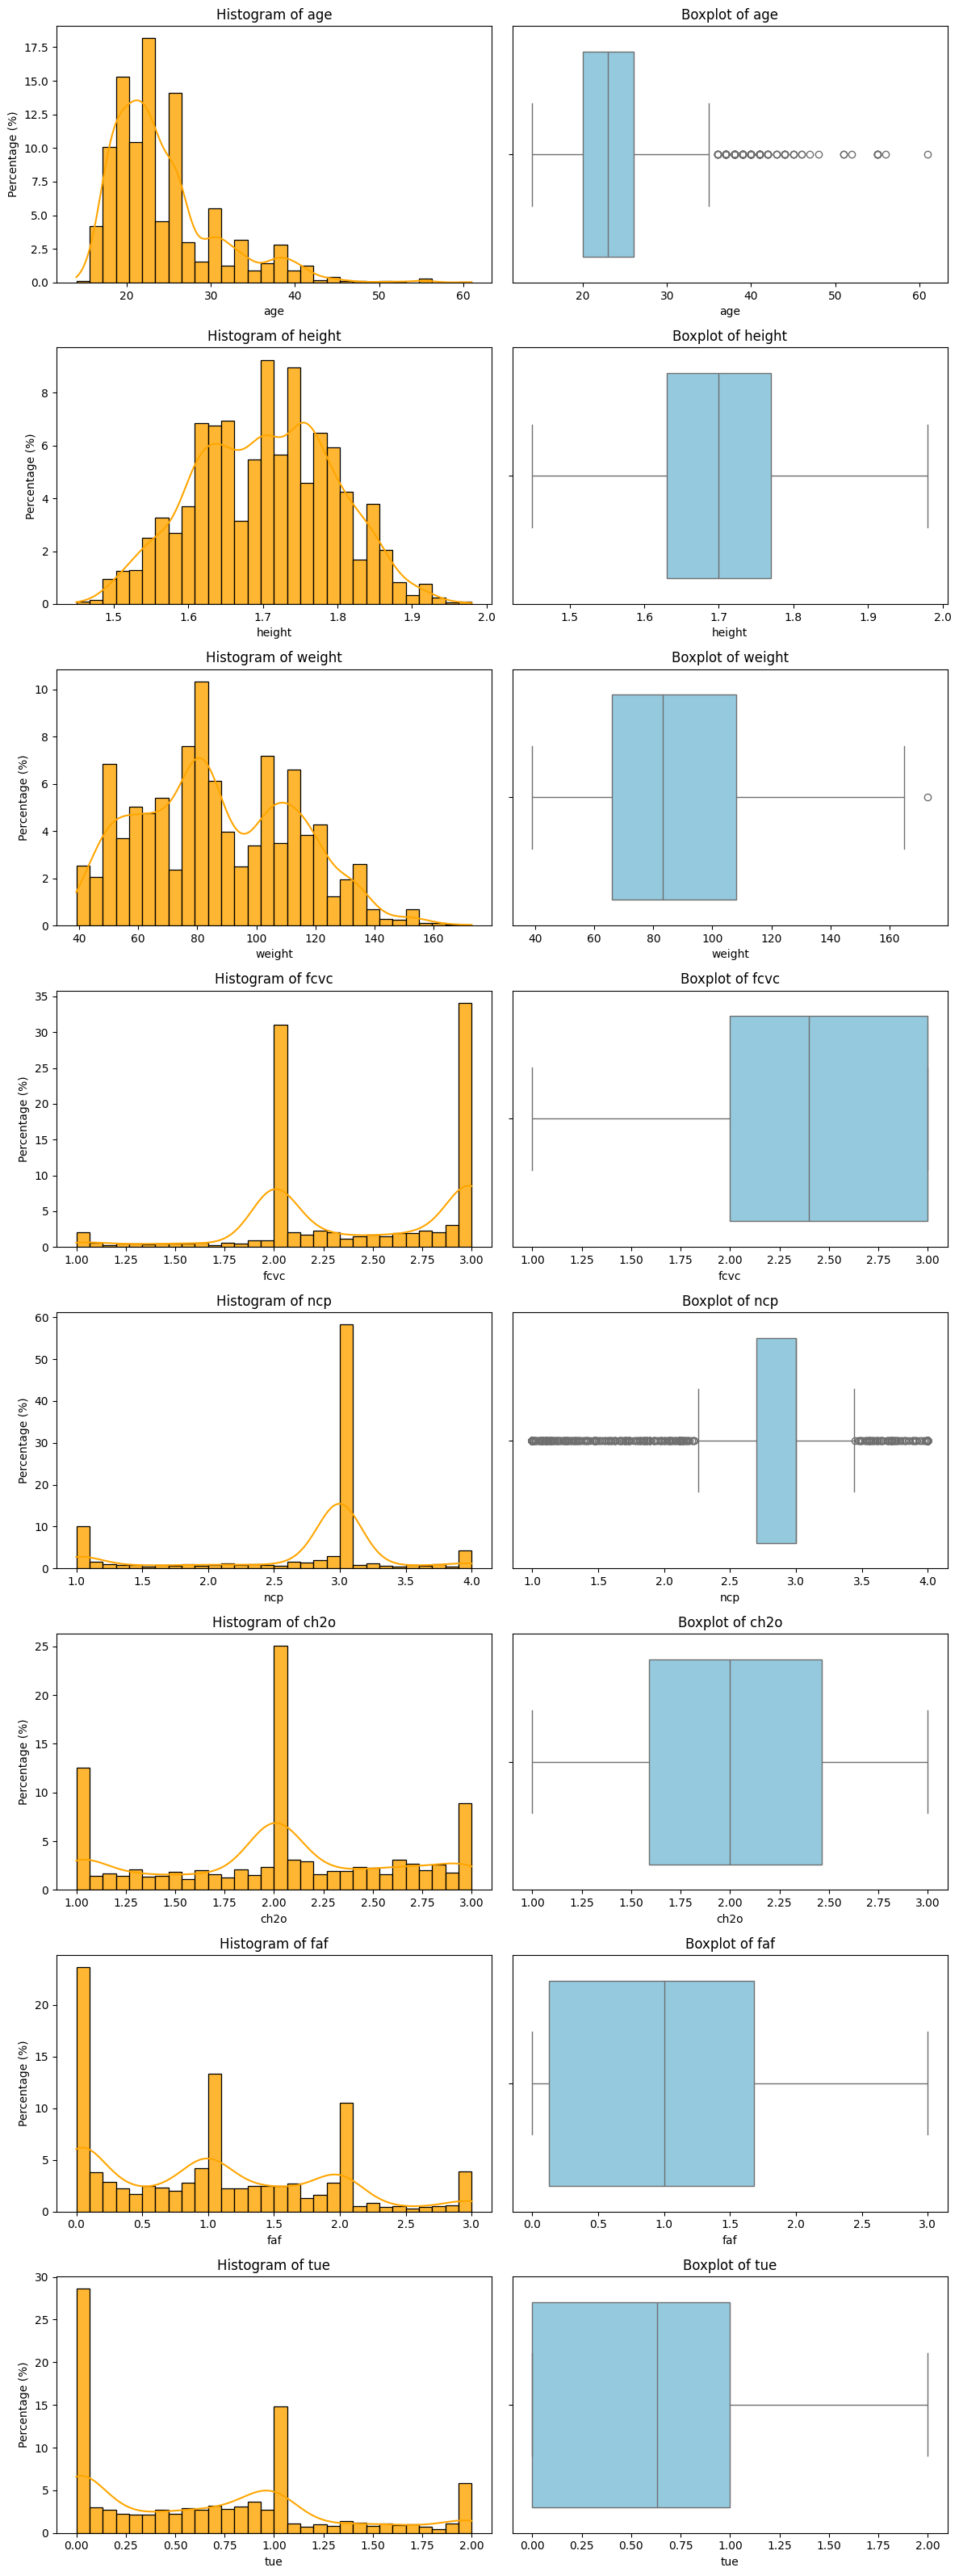

In [17]:
fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, len(num_cols) * 4))

for i, column in enumerate(num_cols):
    # Histogram
    sns.histplot(df[column], kde=True,stat="percent", ax=axes[i, 0], color='orange',edgecolor = 'black',bins=30,alpha=0.8)
    axes[i, 0].set_title(f'Histogram of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Percentage (%)')

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[i, 1], color='skyblue')
    axes[i, 1].set_title(f'Boxplot of {column}')
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

In [18]:
for i in df.columns:
    print(f'{df[i].name} --> unique count: {df[i].nunique()}')
    print(f'unique values: {df[i].unique()}')
    print('-' * 90)

print(df.shape,'\n')

gender --> unique count: 2
unique values: ['Female' 'Male']
------------------------------------------------------------------------------------------
age --> unique count: 40
unique values: [21 23 27 22 29 24 26 41 30 52 20 19 31 39 17 25 55 38 18 15 61 44 34 36
 32 35 40 45 33 51 56 28 16 37 14 42 43 46 48 47]
------------------------------------------------------------------------------------------
height --> unique count: 51
unique values: [1.62 1.52 1.8  1.78 1.5  1.64 1.72 1.85 1.65 1.77 1.7  1.93 1.53 1.71
 1.69 1.6  1.75 1.68 1.58 1.79 1.56 1.67 1.66 1.81 1.82 1.55 1.61 1.63
 1.76 1.57 1.88 1.87 1.89 1.74 1.83 1.92 1.73 1.84 1.91 1.48 1.59 1.54
 1.9  1.86 1.45 1.98 1.51 1.46 1.49 1.95 1.94]
------------------------------------------------------------------------------------------
weight --> unique count: 1335
unique values: [ 64.    56.    77.   ... 131.41 133.69 133.35]
------------------------------------------------------------------------------------------
family_history_wi

# Exploratory Data Analysis

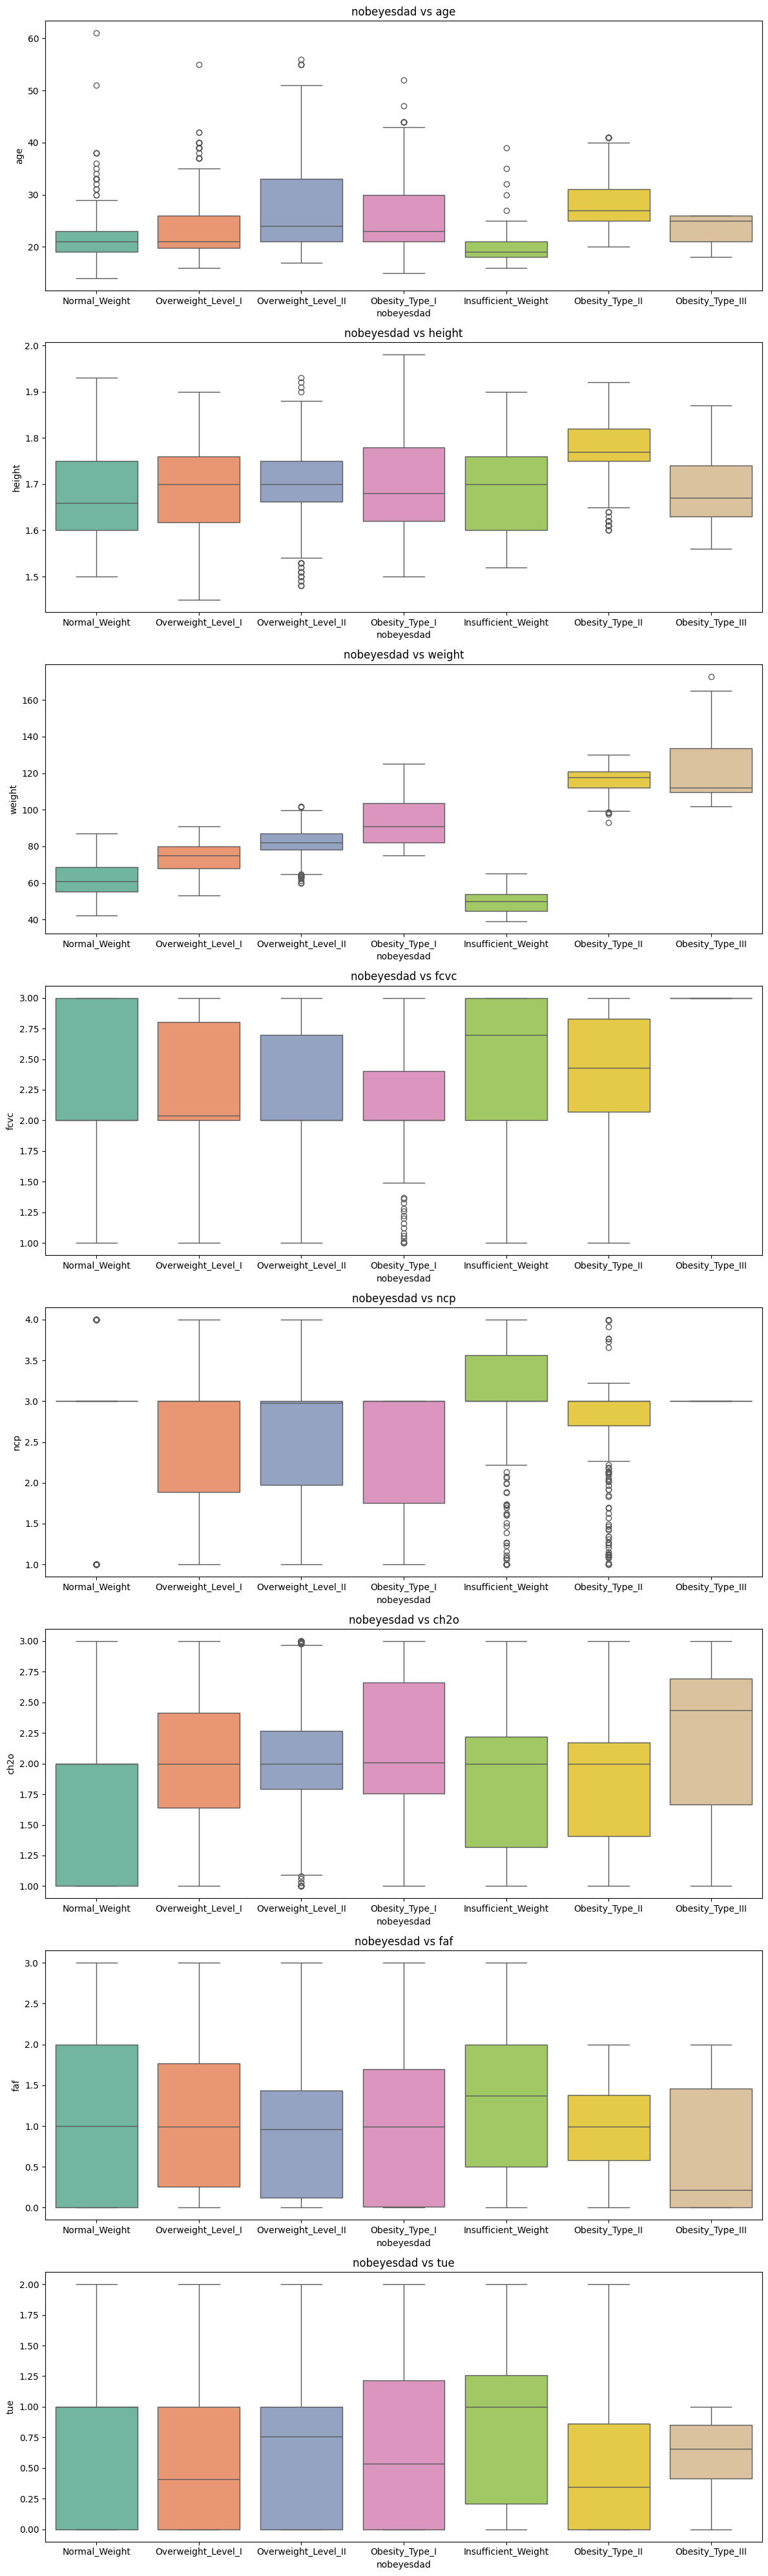

In [19]:
fig, axes = plt.subplots(len(num_cols), 1, figsize=(12, len(num_cols)*5))

for i, column in enumerate(num_cols):
    sns.boxplot(x=df["nobeyesdad"], y=df[column], ax=axes[i], palette='Set2')
    axes[i].set_title(f'nobeyesdad vs {column}')
    axes[i].set_xlabel("nobeyesdad")
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

In [20]:
for column in num_cols:
    groups = [df[df['nobeyesdad'] == cat][column] for cat in df['nobeyesdad'].unique()]  
    f_stat, p_val = f_oneway(*groups)

    if p_val < 0.05:
        print(f"The relationship between nobeyesdad and {column} **is significant** (p-value: {p_val}).\n")
    else:
        print(f"The relationship between nobeyesdad and {column} **is not significant** (p-value: {p_val}).\n")

The relationship between nobeyesdad and age **is significant** (p-value: 1.9282964508166933e-86).

The relationship between nobeyesdad and height **is significant** (p-value: 2.0193543712452164e-43).

The relationship between nobeyesdad and weight **is significant** (p-value: 0.0).

The relationship between nobeyesdad and fcvc **is significant** (p-value: 4.01004360648566e-121).

The relationship between nobeyesdad and ncp **is significant** (p-value: 7.037004605160029e-31).

The relationship between nobeyesdad and ch2o **is significant** (p-value: 4.2724625999452125e-17).

The relationship between nobeyesdad and faf **is significant** (p-value: 1.1816368991081044e-20).

The relationship between nobeyesdad and tue **is significant** (p-value: 1.7717702319262985e-08).



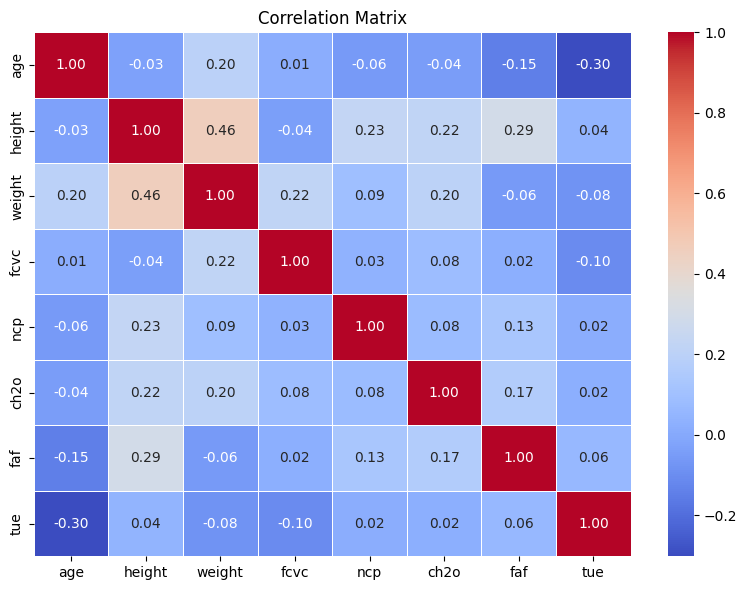

In [21]:
corr_mat = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

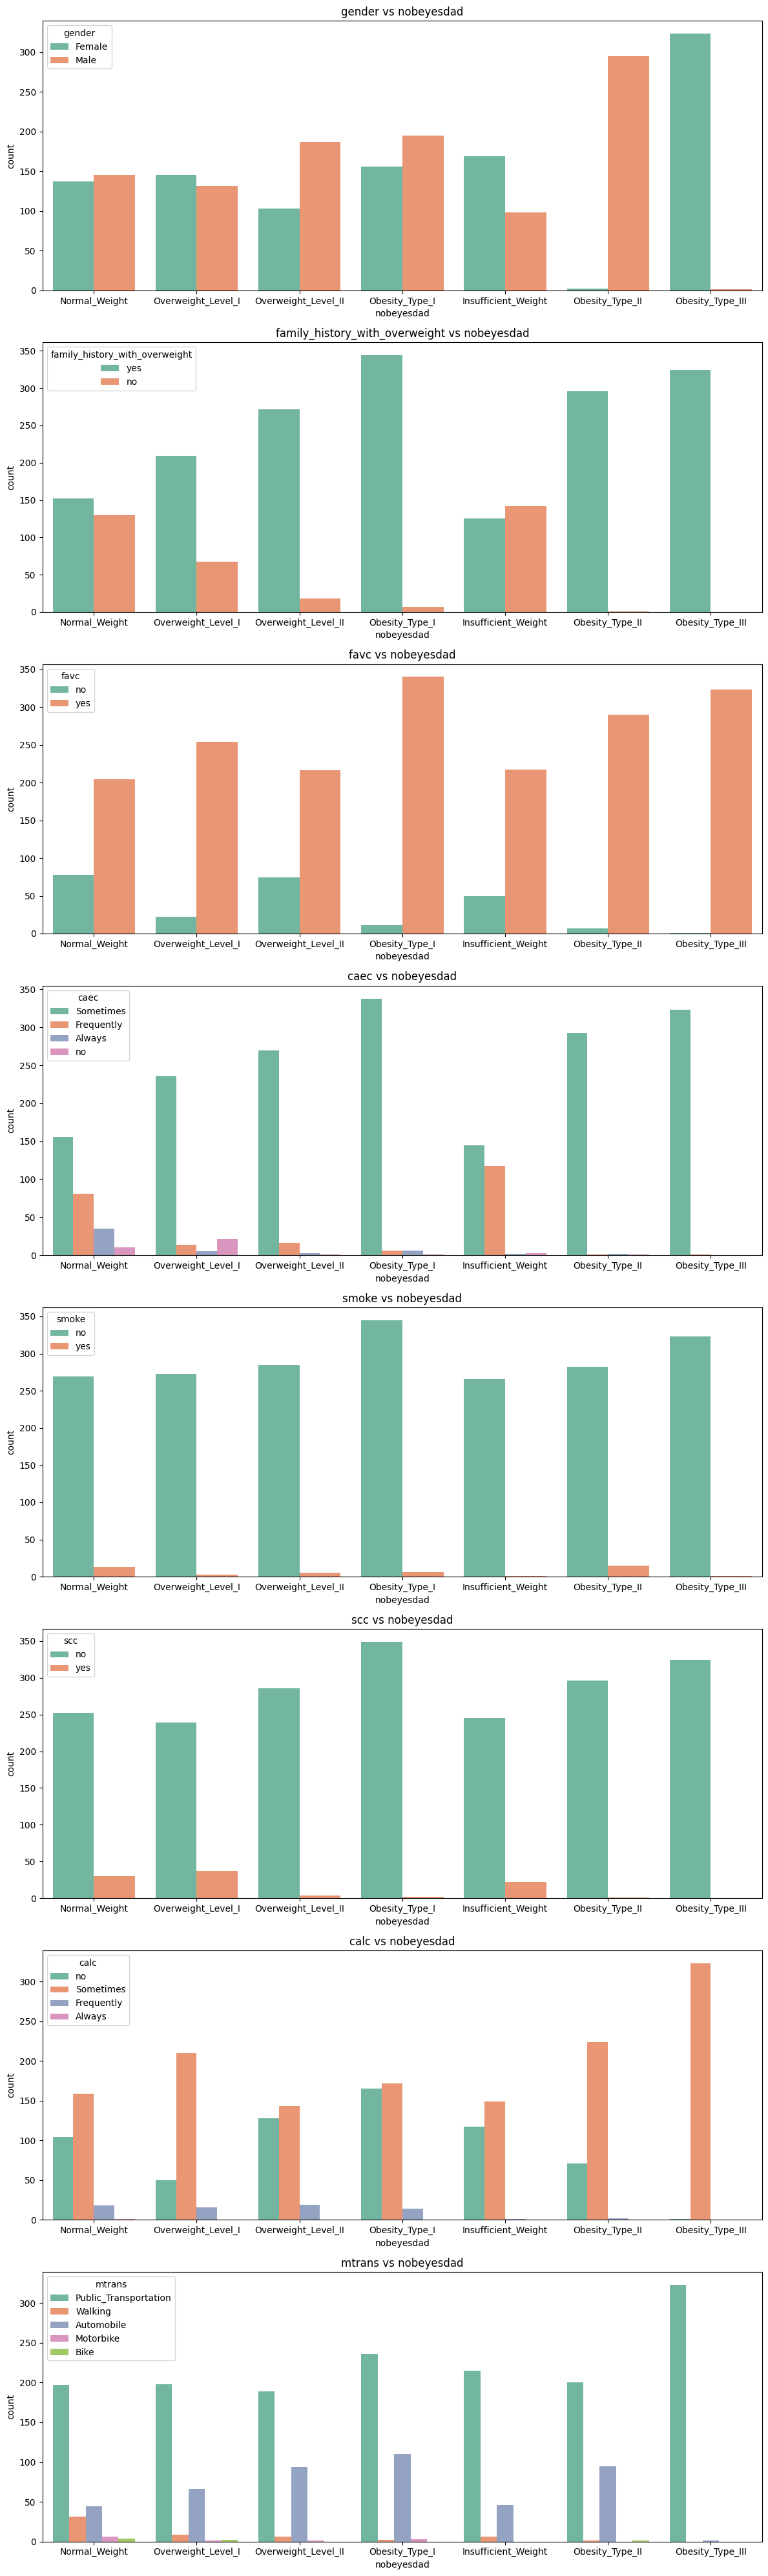

In [22]:
plt.figure(figsize=(12, 40))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(8, 1, i)
    sns.countplot(data=df, x='nobeyesdad', hue=col, palette='Set2')
    plt.title(f'{col} vs nobeyesdad')
    plt.xticks(rotation=0)
    
plt.tight_layout()
plt.show()

In [23]:
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['nobeyesdad'])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)

    if p_val < 0.05:
        print(f"The relationship between nobeyesdad and {col} **is significant** (p-value: {p_val}).\n")
    else:
        print(f"The relationship between nobeyesdad and {col} **is not significant** (p-value: {p_val}).\n")

The relationship between nobeyesdad and gender **is significant** (p-value: 9.357967638719802e-139).

The relationship between nobeyesdad and family_history_with_overweight **is significant** (p-value: 3.5241561087034105e-130).

The relationship between nobeyesdad and favc **is significant** (p-value: 4.0897083168071957e-47).

The relationship between nobeyesdad and caec **is significant** (p-value: 6.30125789731839e-142).

The relationship between nobeyesdad and smoke **is significant** (p-value: 1.7397906082796296e-05).

The relationship between nobeyesdad and scc **is significant** (p-value: 3.3385130651942555e-25).

The relationship between nobeyesdad and calc **is significant** (p-value: 2.22093967310428e-60).

The relationship between nobeyesdad and mtrans **is significant** (p-value: 3.3319887895525333e-47).



# Feature Engineering

## Feature Transformation

In [24]:
label_cols = ['gender', 'family_history_with_overweight', 'favc', 'smoke', 'scc', 'nobeyesdad']
le_mappings = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    le_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

for col, mapping in le_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Mapping for family_history_with_overweight: {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for favc: {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for smoke: {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for scc: {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for nobeyesdad: {'Insufficient_Weight': np.int64(0), 'Normal_Weight': np.int64(1), 'Obesity_Type_I': np.int64(2), 'Obesity_Type_II': np.int64(3), 'Obesity_Type_III': np.int64(4), 'Overweight_Level_I': np.int64(5), 'Overweight_Level_II': np.int64(6)}


In [25]:
df["caec"] = df["caec"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})
df["calc"] = df["calc"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})

In [26]:
df = pd.get_dummies(df, columns=['mtrans'], drop_first=True)
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,nobeyesdad,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking
0,0,21,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,False,False,True,False
1,0,21,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,False,False,True,False
2,1,23,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,False,False,True,False
3,1,27,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,5,False,False,False,True
4,1,22,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,6,False,False,True,False


In [27]:
corr_matrix = df.corr()

nobeyesdad_corr = corr_matrix['nobeyesdad'].to_frame().reset_index().rename(columns={'index': 'features', 'nobeyesdad': 'corr'})\
                                .sort_values(by='corr', ascending=False)

nobeyesdad_corr

,features,corr
15,nobeyesdad,1.000000
3,weight,0.388800
4,family_history_with_overweight,0.330391
1,age,0.237792
14,calc,0.132821
10,ch2o,0.092586
5,favc,0.041023
2,height,0.039395
6,fcvc,0.025803
0,gender,0.014699


## Feature Importance

In [28]:
X = df.drop("nobeyesdad",axis=1)
y = df["nobeyesdad"]

X_ftrain,X_ftest,y_ftrain,y_ftest = train_test_split(X,y,test_size=0.25,random_state=42)

X_ftrain.shape, X_ftest.shape, y_ftrain.shape, y_ftest.shape

((1565, 19), (522, 19), (1565,), (522,))

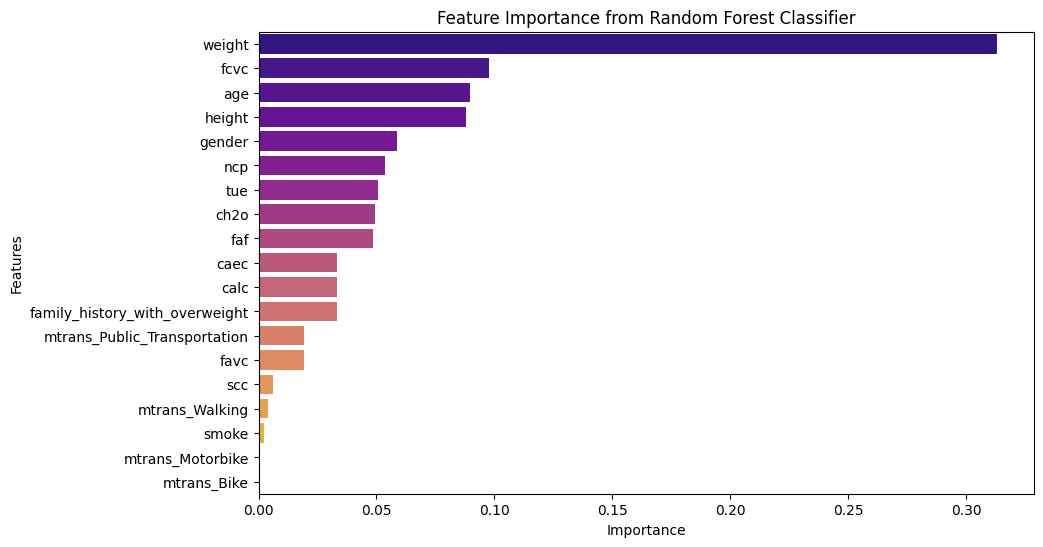

In [29]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_ftrain,y_ftrain)

importances_rf = rf_model.feature_importances_
features_rf = X_ftrain.columns

importance_rf = pd.DataFrame({
    "Features":features_rf,
    "Importance":importances_rf
}).sort_values(by="Importance",ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x="Importance",y="Features",data=importance_rf,palette="plasma")
plt.title("Feature Importance from Random Forest Classifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

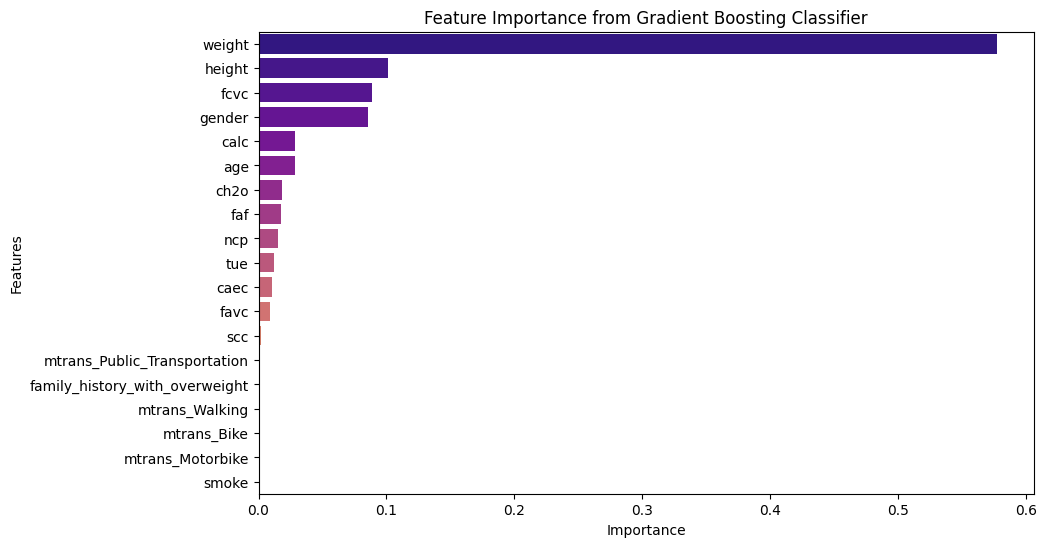

In [30]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_ftrain, y_ftrain)

importances_gb = gb_model.feature_importances_
features_gb = X_ftrain.columns

importance_gb = pd.DataFrame({
    "Features":features_gb,
    "Importance":importances_gb
}).sort_values(by="Importance",ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x="Importance",y="Features",data=importance_gb,palette="plasma")
plt.title("Feature Importance from Gradient Boosting Classifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Modelling and Hyperparameter Tuning

In [31]:
features = df.drop("nobeyesdad",axis=1)
target = df["nobeyesdad"]

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.25,stratify=target,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1565, 19), (522, 19), (1565,), (522,))

In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Logistic Regression

In [33]:
lr = LogisticRegression(max_iter = 5000,random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'], 
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'saga']  
}

grid_search_lr = GridSearchCV(estimator=lr,param_grid=param_grid, cv=5, n_jobs=-1,scoring='accuracy')
grid_search_lr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [34]:
grid_search_lr.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}

In [35]:
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test,y_pred_lr)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Model Accuracy: 94.44%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.95      0.87      0.91        70
           2       0.99      0.95      0.97        88
           3       0.96      1.00      0.98        74
           4       1.00      0.99      0.99        81
           5       0.87      0.87      0.87        69
           6       0.88      0.93      0.91        73

    accuracy                           0.94       522
   macro avg       0.94      0.94      0.94       522
weighted avg       0.95      0.94      0.94       522



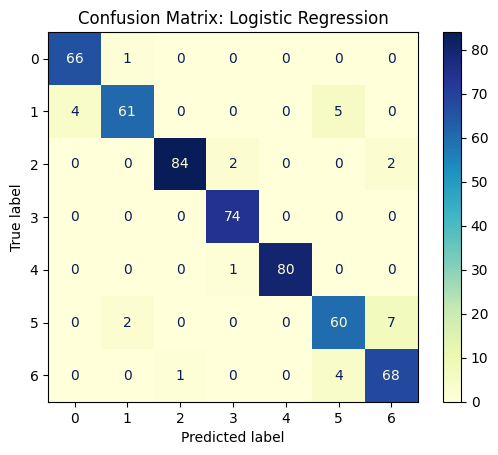

In [37]:
cm_lr = confusion_matrix(y_test,y_pred_lr)

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,display_labels=best_model_lr.classes_)
disp_lr.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

## K-Nearest Neighbors

Best k value (highest accuracy): 1
Best accuracy score: 0.8275862068965517


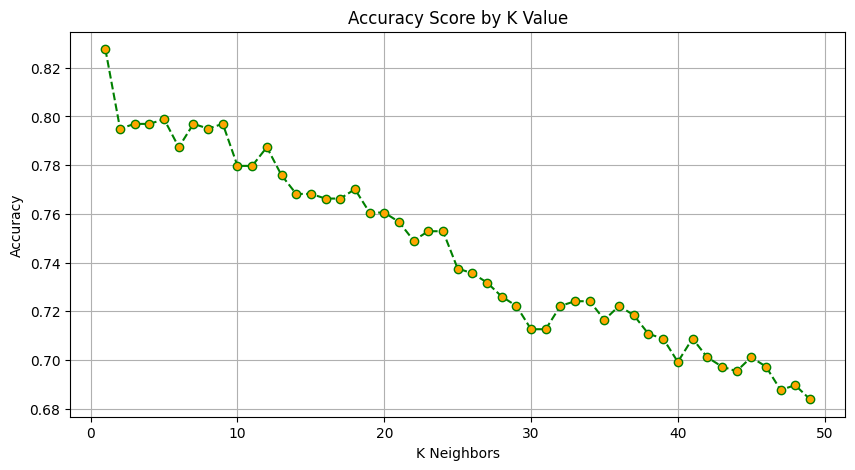

In [38]:
accuracy_scores = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, knn_pred)
    accuracy_scores.append(acc)

best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print("Best k value (highest accuracy):", best_k)
print("Best accuracy score:", max(accuracy_scores))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 50), accuracy_scores, color='green', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=6)
plt.title('Accuracy Score by K Value')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
y_pred_knn = knn.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test,y_pred_knn)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Model Accuracy: 82.76%
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83        67
           1       0.64      0.53      0.58        70
           2       0.86      0.90      0.88        88
           3       0.96      0.92      0.94        74
           4       0.99      1.00      0.99        81
           5       0.78      0.71      0.74        69
           6       0.73      0.79      0.76        73

    accuracy                           0.83       522
   macro avg       0.82      0.82      0.82       522
weighted avg       0.82      0.83      0.82       522



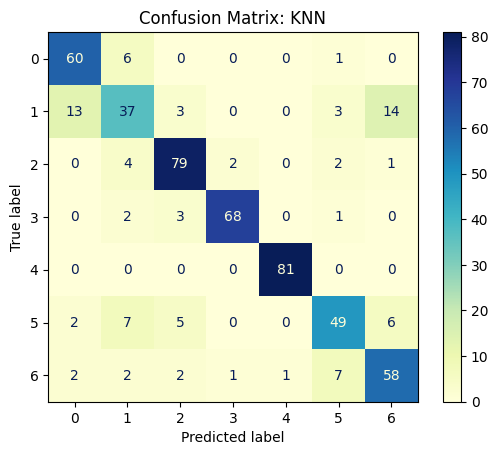

In [42]:
cm_knn = confusion_matrix(y_test,y_pred_knn)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=knn.classes_)
disp_knn.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: KNN")
plt.show()

## Decision Trees

In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred_dt = dt.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test,y_pred_dt)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Model Accuracy: 90.23%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90        67
           1       0.82      0.71      0.76        70
           2       0.92      0.91      0.91        88
           3       0.99      0.96      0.97        74
           4       1.00      0.99      0.99        81
           5       0.87      0.78      0.82        69
           6       0.88      0.96      0.92        73

    accuracy                           0.90       522
   macro avg       0.90      0.90      0.90       522
weighted avg       0.90      0.90      0.90       522



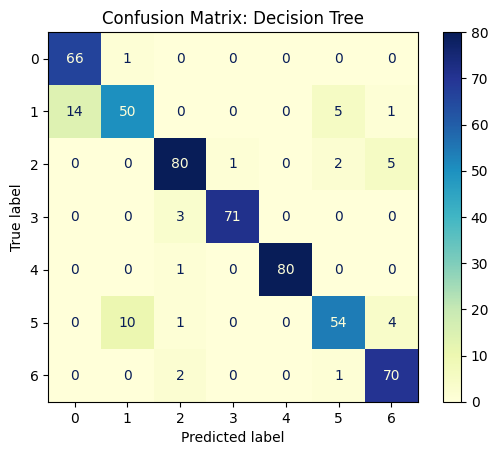

In [46]:
cm_dt = confusion_matrix(y_test,y_pred_dt)

disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=dt.classes_)
disp_dt.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: Decision Tree")
plt.show()

## Random Forest

In [47]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred_rf = rf.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test,y_pred_rf)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Model Accuracy: 94.44%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.85      0.90      0.88        70
           2       0.96      0.97      0.96        88
           3       1.00      0.99      0.99        74
           4       1.00      0.99      0.99        81
           5       0.92      0.88      0.90        69
           6       0.92      0.93      0.93        73

    accuracy                           0.94       522
   macro avg       0.94      0.94      0.94       522
weighted avg       0.95      0.94      0.94       522



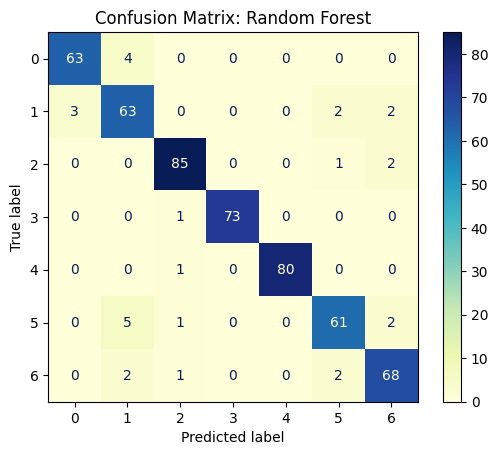

In [50]:
cm_rf = confusion_matrix(y_test,y_pred_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=rf.classes_)
disp_rf.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: Random Forest")
plt.show()

## SVC

In [51]:
svc = SVC(random_state=42)

param_grid = {
    'C': [0.01,0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [3, 4, 5]
}

grid_search_svc = GridSearchCV(svc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [52]:
grid_search_svc.best_params_

{'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}

In [53]:
best_model_svc = grid_search_svc.best_estimator_
y_pred_svc = best_model_svc.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test,y_pred_svc)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

Model Accuracy: 95.21%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.93      0.94      0.94        70
           2       0.97      0.99      0.98        88
           3       0.97      0.99      0.98        74
           4       1.00      0.99      0.99        81
           5       0.92      0.87      0.90        69
           6       0.89      0.93      0.91        73

    accuracy                           0.95       522
   macro avg       0.95      0.95      0.95       522
weighted avg       0.95      0.95      0.95       522



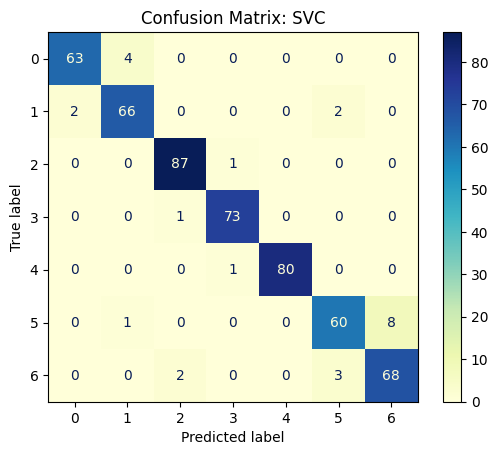

In [55]:
cm_svc = confusion_matrix(y_test,y_pred_svc)

disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc,display_labels=best_model_svc.classes_)
disp_svc.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: SVC")
plt.show()

## Gradient Boosting

In [56]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [57]:
y_pred_gb = gb.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test,y_pred_gb)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

Model Accuracy: 93.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.96      0.79      0.87        70
           2       0.97      0.95      0.96        88
           3       0.96      0.99      0.97        74
           4       1.00      0.96      0.98        81
           5       0.84      0.90      0.87        69
           6       0.88      0.93      0.91        73

    accuracy                           0.93       522
   macro avg       0.93      0.93      0.93       522
weighted avg       0.93      0.93      0.93       522



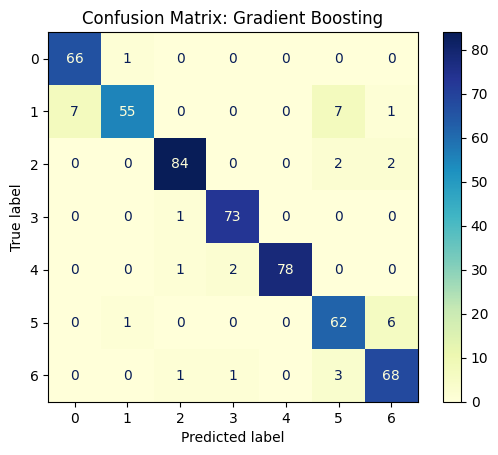

In [59]:
cm_gb = confusion_matrix(y_test,y_pred_gb)

disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb,display_labels=gb.classes_)
disp_gb.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: Gradient Boosting")
plt.show()

## XGB

In [63]:
xgb = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

random_search_xgb = RandomizedSearchCV(xgb,param_grid, cv=5, n_jobs=-1, scoring='accuracy')
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='accuracy')

In [64]:
random_search_xgb.best_params_

{'subsample': 1.0,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.8}

In [65]:
best_model_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test,y_pred_xgb)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Model Accuracy: 79.69%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        74
           1       0.96      0.59      0.73        76
           2       0.74      0.69      0.72        71
           3       0.66      0.98      0.79        57
           4       0.99      0.99      0.99        85
           5       0.63      1.00      0.77        82
           6       1.00      0.36      0.53        77

    accuracy                           0.80       522
   macro avg       0.84      0.80      0.78       522
weighted avg       0.85      0.80      0.78       522



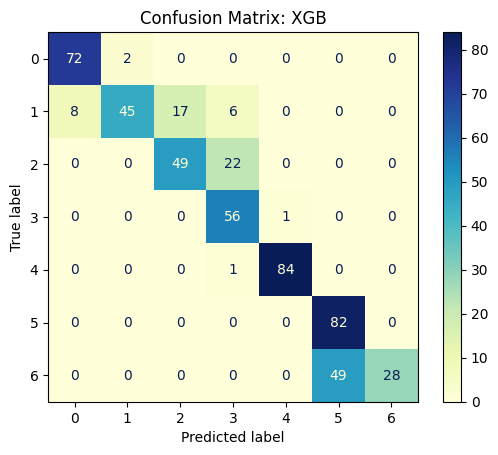

In [67]:
cm_xgb = confusion_matrix(y_test,y_pred_xgb)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=best_model_xgb.classes_)
disp_xgb.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: XGB")
plt.show()

## LGBM

In [68]:
lgb = LGBMClassifier(verbose=-1)
lgb.fit(X_train,y_train)

LGBMClassifier(verbose=-1)

In [69]:
y_pred_lgb = lgb.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test,y_pred_lgb)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))

Model Accuracy: 91.76%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        74
           1       0.93      0.70      0.80        76
           2       0.72      0.77      0.75        71
           3       0.78      1.00      0.88        57
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        82
           6       1.00      1.00      1.00        77

    accuracy                           0.92       522
   macro avg       0.92      0.92      0.91       522
weighted avg       0.92      0.92      0.92       522



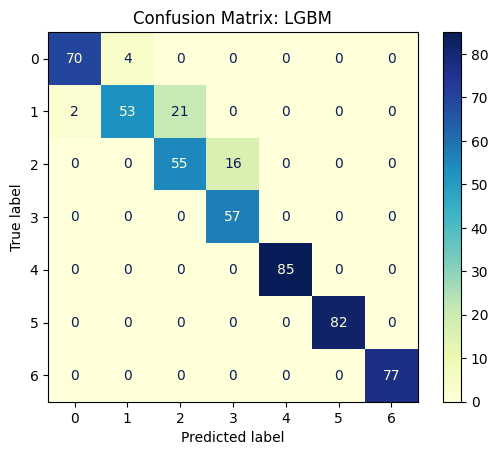

In [71]:
cm_lgb = confusion_matrix(y_test,y_pred_lgb)

disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb,display_labels=lgb.classes_)
disp_lgb.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: LGBM")
plt.show()

## Cat Boost Classifier

In [60]:
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train,y_train)

In [61]:
y_pred_cat = cat.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test,y_pred_cat)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_cat))

Model Accuracy: 96.74%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.97      0.90      0.93        70
           2       0.97      0.98      0.97        88
           3       1.00      0.99      0.99        74
           4       1.00      0.99      0.99        81
           5       0.92      0.94      0.93        69
           6       0.95      0.99      0.97        73

    accuracy                           0.97       522
   macro avg       0.97      0.97      0.97       522
weighted avg       0.97      0.97      0.97       522



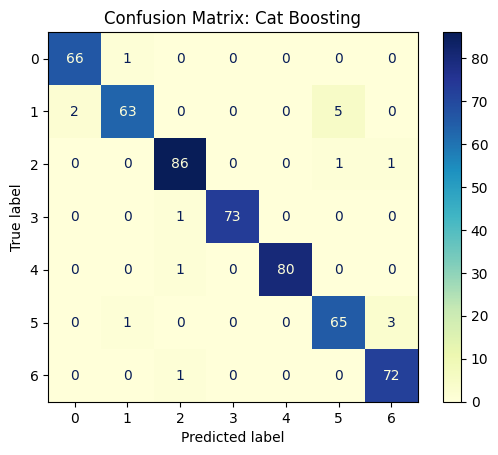

In [63]:
cm_cat = confusion_matrix(y_test,y_pred_cat)

disp_cat = ConfusionMatrixDisplay(confusion_matrix=cm_cat,display_labels=cat.classes_)
disp_cat.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: Cat Boosting")
plt.show()

# Pipeline

In [64]:
df_pipeline = pd.read_csv("obesity.csv")
df_pipeline.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [65]:
df_pipeline.drop_duplicates(inplace=True)

In [66]:
X = df_pipeline.drop("NObeyesdad", axis=1)
y = df_pipeline["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=42)

In [67]:
preprocessor = ColumnTransformer(transformers=[
    # Ordinal encoding for both ordered and binary columns
    ("ord", OrdinalEncoder(categories=[
        ["Female", "Male"],  # For Gender (binary)
        ["no", "Sometimes", "Frequently", "Always"],  # For CAEC
        ["no", "Sometimes", "Frequently", "Always"],  # For CALC
        ["no", "yes"],  # For family_history_with_overweight (binary)
        ["no", "yes"],  # For FAVC (binary)
        ["no", "yes"],  # For SMOKE (binary)
        ["no", "yes"],  # For SCC (binary)
    ]), ["Gender", "CAEC", "CALC", "family_history_with_overweight", "FAVC", "SMOKE", "SCC"]),

    # One-hot encoding for MTRANS (transportation mode)
    ("ohe", OneHotEncoder(drop="first"), ["MTRANS"]),

    # Standard scaling for numeric features
    ("num", StandardScaler(), ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"])
])

In [68]:
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", catboost_model)
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always'],
                                                                             ['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'yes']]),
                                                  ['Gender', 'CAEC', 'CALC',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x0000029C402883B0>)])

In [69]:
y_pred_pipeline = pipeline.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test,y_pred_pipeline)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_pipeline))

Model Accuracy: 97.70%
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.99      0.99      0.99        67
      Normal_Weight       0.93      0.94      0.94        70
     Obesity_Type_I       0.98      0.99      0.98        88
    Obesity_Type_II       1.00      0.99      0.99        74
   Obesity_Type_III       1.00      0.99      0.99        81
 Overweight_Level_I       0.96      0.94      0.95        69
Overweight_Level_II       0.99      1.00      0.99        73

           accuracy                           0.98       522
          macro avg       0.98      0.98      0.98       522
       weighted avg       0.98      0.98      0.98       522



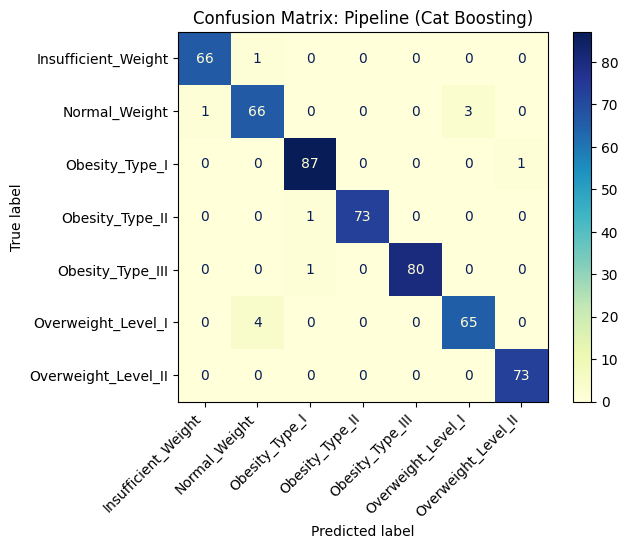

In [71]:
cm_pipeline = confusion_matrix(y_test,y_pred_pipeline)

disp_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_pipeline,display_labels=pipeline.classes_)
disp_pipeline.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: Pipeline (Cat Boosting)")
plt.xticks(rotation=45,ha="right") 
plt.show()

In [72]:
# Get the fitted OrdinalEncoder from the pipeline
ordinal_encoder = pipeline.named_steps["preprocessor"].named_transformers_["ord"]

# All  columns in the order passed to the encoder
ord_cols = ["Gender", "CAEC", "CALC", "family_history_with_overweight", "FAVC", "SMOKE", "SCC"]

# Show mappings
for col_name, categories in zip(ord_cols, ordinal_encoder.categories_):
    print(f"{col_name}:")
    for idx, category in enumerate(categories):
        print(f"  {category} → {idx}")

Gender:
  Female → 0
  Male → 1
CAEC:
  no → 0
  Sometimes → 1
  Frequently → 2
  Always → 3
CALC:
  no → 0
  Sometimes → 1
  Frequently → 2
  Always → 3
family_history_with_overweight:
  no → 0
  yes → 1
FAVC:
  no → 0
  yes → 1
SMOKE:
  no → 0
  yes → 1
SCC:
  no → 0
  yes → 1


In [73]:
# Access the OneHotEncoder
ohe_encoder = pipeline.named_steps["preprocessor"].named_transformers_["ohe"]

# Categorical column
ohe_col = ["MTRANS"]

# Print category mapping
for col_name, categories in zip(ohe_col, ohe_encoder.categories_):
    print(f"{col_name}:")
    for idx, category in enumerate(categories):
        print(f"  {category} → {'dropped' if idx == 0 else idx}")  # because drop='first'

MTRANS:
  Automobile → dropped
  Bike → 1
  Motorbike → 2
  Public_Transportation → 3
  Walking → 4


# Deployment

In [74]:
joblib.dump(pipeline, 'best_model.pkl')
loaded_model = joblib.load('best_model.pkl')